In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In this notebook we want to explore the number of classes included by paritioning the training data in 10% portions

In [ ]:
import os, glob
import matplotlib.pyplot as plt
import numpy as np
import pickle
import nibabel as nb
import matplotlib.image as mpimg
import cv2
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras.utils import normalize
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm 
from sys import getsizeof
from tensorflow.keras.models import load_model

import nibabel as nib

In [ ]:
# Define constants

# Path variables
data_path = '/content/drive/Shareddrives/Banana Leaf Development/Data/Couinaud_Annotation_Data/'
training_img_path = os.path.join(data_path, 'percent_partition/training/img_raw/raw/')
training_couinaud_path = os.path.join(data_path, 'percent_partition/training/couinaud_raw/raw/')

NUM_PARTITIONS = 10

In [ ]:
ten = []
twenty= [] 
thirty = []
forty = []
fifty = []
sixty = []
seventy = []
eighty = []
ninety = []
one_hundred = []
slices = []

for index, img_path in tqdm(enumerate(sorted(glob.iglob(training_couinaud_path + '*.nii.gz')))):
  
  img = nb.load(img_path).get_fdata()
  num_slices = img.shape[2]
  partition_size = round(num_slices / NUM_PARTITIONS)
  slices.append(num_slices)

  ten.append(np.unique(img[:,:,0:partition_size]))
  twenty.append(np.unique(img[:,:,partition_size:partition_size*2]))
  thirty.append(np.unique(img[:,:,partition_size *2:partition_size*3]))
  forty.append(np.unique(img[:,:,partition_size  *3:partition_size*4]))
  fifty.append(np.unique(img[:,:,partition_size  *4:partition_size*5]))
  sixty.append(np.unique(img[:,:,partition_size  *5:partition_size*6]))
  seventy.append(np.unique(img[:,:,partition_size*6:partition_size*7]))
  eighty.append(np.unique(img[:,:,partition_size *7:partition_size*8]))
  ninety.append(np.unique(img[:,:,partition_size *8:partition_size*9]))
  one_hundred.append(np.unique(img[:,:,partition_size *9:]))
  


153it [01:36,  1.58it/s]


In [ ]:
#Flatten Lists and convert them to numpy arrays
ten    =  np.array(  [item for sublist in ten for item in sublist]     )
twenty =  np.array(  [item for sublist in twenty for item in sublist]  )
thirty =  np.array(  [item for sublist in thirty for item in sublist]  )
forty  =  np.array(  [item for sublist in forty for item in sublist]   )
fifty  =  np.array(  [item for sublist in fifty for item in sublist]   )
sixty  =  np.array(  [item for sublist in sixty for item in sublist]   )
seventy=  np.array(  [item for sublist in seventy for item in sublist] )
eighty =  np.array(  [item for sublist in eighty for item in sublist]  )
ninety =  np.array(  [item for sublist in ninety for item in sublist]  )
one_hundred = np.array(  [item for sublist in one_hundred for item in sublist]  )

In [ ]:
print(ten.shape)
print(twenty.shape)
print(thirty.shape)
print(forty.shape)
print(fifty.shape)
print(sixty.shape)
print(seventy.shape)
print(eighty.shape)
print(ninety.shape)
print(one_hundred.shape)

(218,)
(371,)
(470,)
(605,)
(768,)
(1017,)
(1044,)
(918,)
(753,)
(398,)


In [ ]:
print(np.unique(ten))
print(np.unique(twenty))
print(np.unique(thirty))
print(np.unique(forty))
print(np.unique(fifty))
print(np.unique(sixty))
print(np.unique(seventy))
print(np.unique(eighty))
print(np.unique(ninety))
print(np.unique(one_hundred))

[0. 3. 4. 5. 6. 7. 8.]
[0. 1. 3. 4. 5. 6. 7. 8.]
[0. 1. 3. 4. 5. 6. 7. 8.]
[0. 1. 2. 3. 4. 5. 6. 7. 8.]
[0. 1. 2. 3. 4. 5. 6. 7. 8.]
[0. 1. 2. 3. 4. 5. 6. 7. 8.]
[0. 1. 2. 3. 4. 5. 6. 7. 8.]
[0. 1. 2. 3. 4. 5. 6. 7. 8.]
[0. 1. 2. 3. 4. 6. 7. 8.]
[0. 1. 2. 3. 4. 7. 8.]


In [ ]:
import seaborn as sns
import collections
sns.set_theme(style="darkgrid")

all_partitions = [ten,twenty,thirty,forty,fifty,
                  sixty,seventy,eighty,ninety,one_hundred]

<ten> corrresponds to the number of classes included in the first 10% of the training data. <twenty> corresponds to the second 10% of the training portion and so on .. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Counter({0.0: 153, 5.0: 27, 6.0: 25, 4.0: 6, 7.0: 3, 8.0: 3, 3.0: 1})


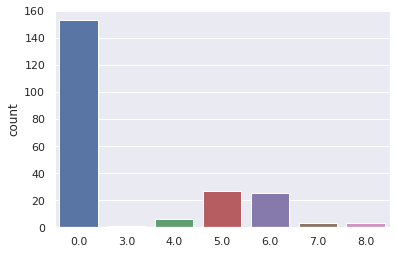

In [ ]:
 sns.countplot(ten)
print(collections.Counter(ten))


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Counter({0.0: 153, 5.0: 93, 6.0: 91, 4.0: 15, 3.0: 10, 1.0: 3, 7.0: 3, 8.0: 3})


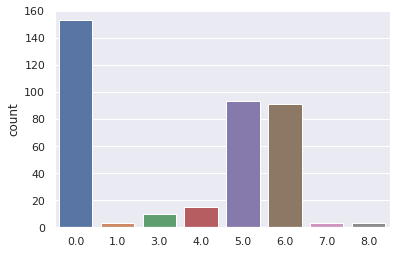

In [ ]:
 sns.countplot(twenty)
print(collections.Counter(twenty))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Counter({0.0: 153, 5.0: 123, 6.0: 120, 4.0: 34, 3.0: 28, 1.0: 5, 8.0: 4, 7.0: 3})


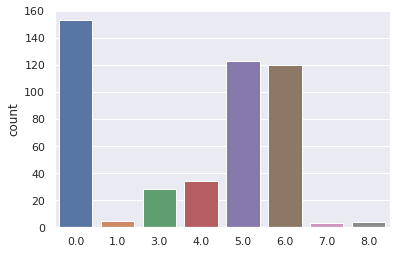

In [ ]:
 sns.countplot(thirty)
print(collections.Counter(thirty))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Counter({0.0: 153, 5.0: 142, 6.0: 142, 4.0: 69, 3.0: 57, 1.0: 19, 7.0: 11, 8.0: 11, 2.0: 1})


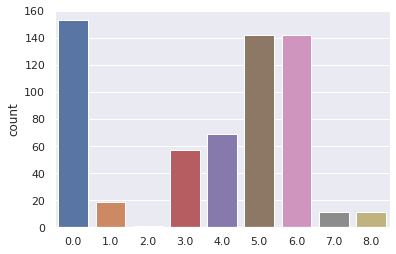

In [ ]:
 sns.countplot(forty)
print(collections.Counter(forty))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Counter({0.0: 153, 5.0: 137, 6.0: 137, 4.0: 115, 3.0: 97, 1.0: 62, 7.0: 29, 8.0: 29, 2.0: 9})


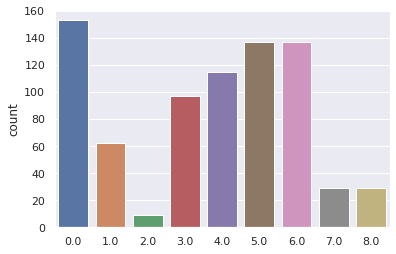

In [ ]:
 sns.countplot(fifty)
print(collections.Counter(fifty))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Counter({0.0: 153, 4.0: 147, 1.0: 132, 3.0: 122, 6.0: 115, 5.0: 113, 7.0: 100, 8.0: 100, 2.0: 35})


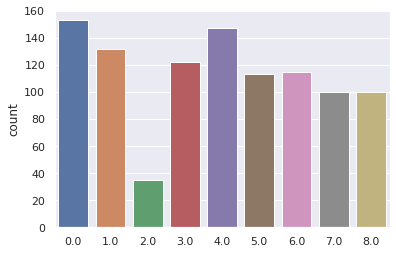

In [ ]:
 sns.countplot(sixty)
print(collections.Counter(sixty))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Counter({0.0: 153, 4.0: 153, 1.0: 150, 7.0: 149, 8.0: 149, 2.0: 112, 3.0: 100, 6.0: 41, 5.0: 37})


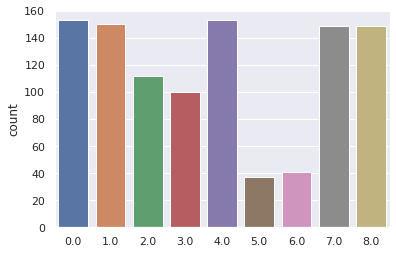

In [ ]:
 sns.countplot(seventy)
print(collections.Counter(seventy))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Counter({0.0: 153, 8.0: 151, 4.0: 149, 7.0: 149, 2.0: 142, 1.0: 138, 3.0: 29, 6.0: 4, 5.0: 3})


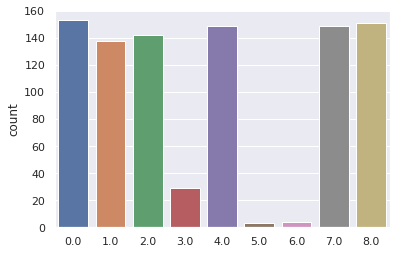

In [ ]:
 sns.countplot(eighty)
print(collections.Counter(eighty))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Counter({0.0: 153, 8.0: 145, 4.0: 134, 7.0: 132, 2.0: 114, 1.0: 70, 3.0: 4, 6.0: 1})


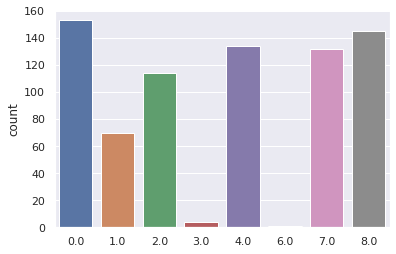

In [ ]:
 sns.countplot(ninety)
print(collections.Counter(ninety))


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Counter({0.0: 145, 8.0: 77, 4.0: 63, 7.0: 56, 2.0: 42, 1.0: 13, 3.0: 2})


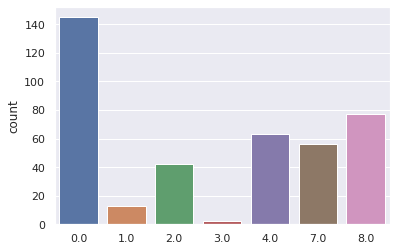

In [ ]:
 sns.countplot(one_hundred)
print(collections.Counter(one_hundred))
